Akil Bhuiyan <br>
Professor Matthew Fried <br>
CSCI 381 (Data Analytics) <br>
Project 1 



### ```Diabetes Data Sets```
 
This Diabetes Dataset consists of information on 768 female populations: 268 tested positive and 500 tested negative instances coming from a population of Pima Indian heritage with at least 21 years old female patients. Tested positive and tested negative indicates whether the patient is diabetic or not, respectively. Each instance is comprised of 8 attributes, which are all numeric. These data contain personal health data as well as results from medical examinations. The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
 
 
### ```Attributes```
 

 
      Pregnancies - Number of times pregnant

      Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test

      BloodPressure - Diastolic blood pressure (mm Hg)

      SkinThickness - Triceps skin fold thickness (mm)

      Insulin - 2-Hour serum insulin (mu U/ml)

      BMI - Body mass index (weight in kg/(height in m)^2)

      DiabetesPedigreeFunction - Diabetes pedigree function

      Age - Age (years)

      Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0
 

In this project, I am going to explore the data that will visualize, how certain diagnostic factors affect the diabetes outcome of female patients.
 




## Imports 

**Pandas, Numpy, Seaborn, Matplotlib**  <br>
%mathplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

## Data Loading

In [3]:
csvv = 'https://docs.google.com/spreadsheets/e/e/2PACX-1vQltPMp4v0kZZ8gSAmxTWjSb1lBRPGE0R4b8mJE-wr2iNAwgLOuuVzvzKuaKofEVrqJyMBfNAK2eUyz/pub?gid=1724647121&single=true&output=csv'
csvv = 'https://raw.githubusercontent.com/iakil/CSCI381_DataScience/main/Data/diabetes.csv'
df = pd.read_csv(csvv) # read dataframe using pandas read_csv
myData = df.copy

In [4]:
df # print the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Print first and last 5 rows from the dataframe

In [5]:
print ("First five  rows of the dataframe: \n",df.head())
print ("Last five  rows of the dataframe: \n",df.tail())

First five  rows of the dataframe: 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Last five  rows of the dataframe: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765     

Count all the null values from each attribute.

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Correlation of the data
 
Non-numeric data will be excluded; positive correlation means if x increases y also increases, and vice versa.


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Out of each attribute, find all the unique values. 

In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Get the statistical information of the numerical column using describe method.

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Retrieve some basic information such as object types, number of entries and columns. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# EDA

Created histograms and correlation scatter plot of all the columns.

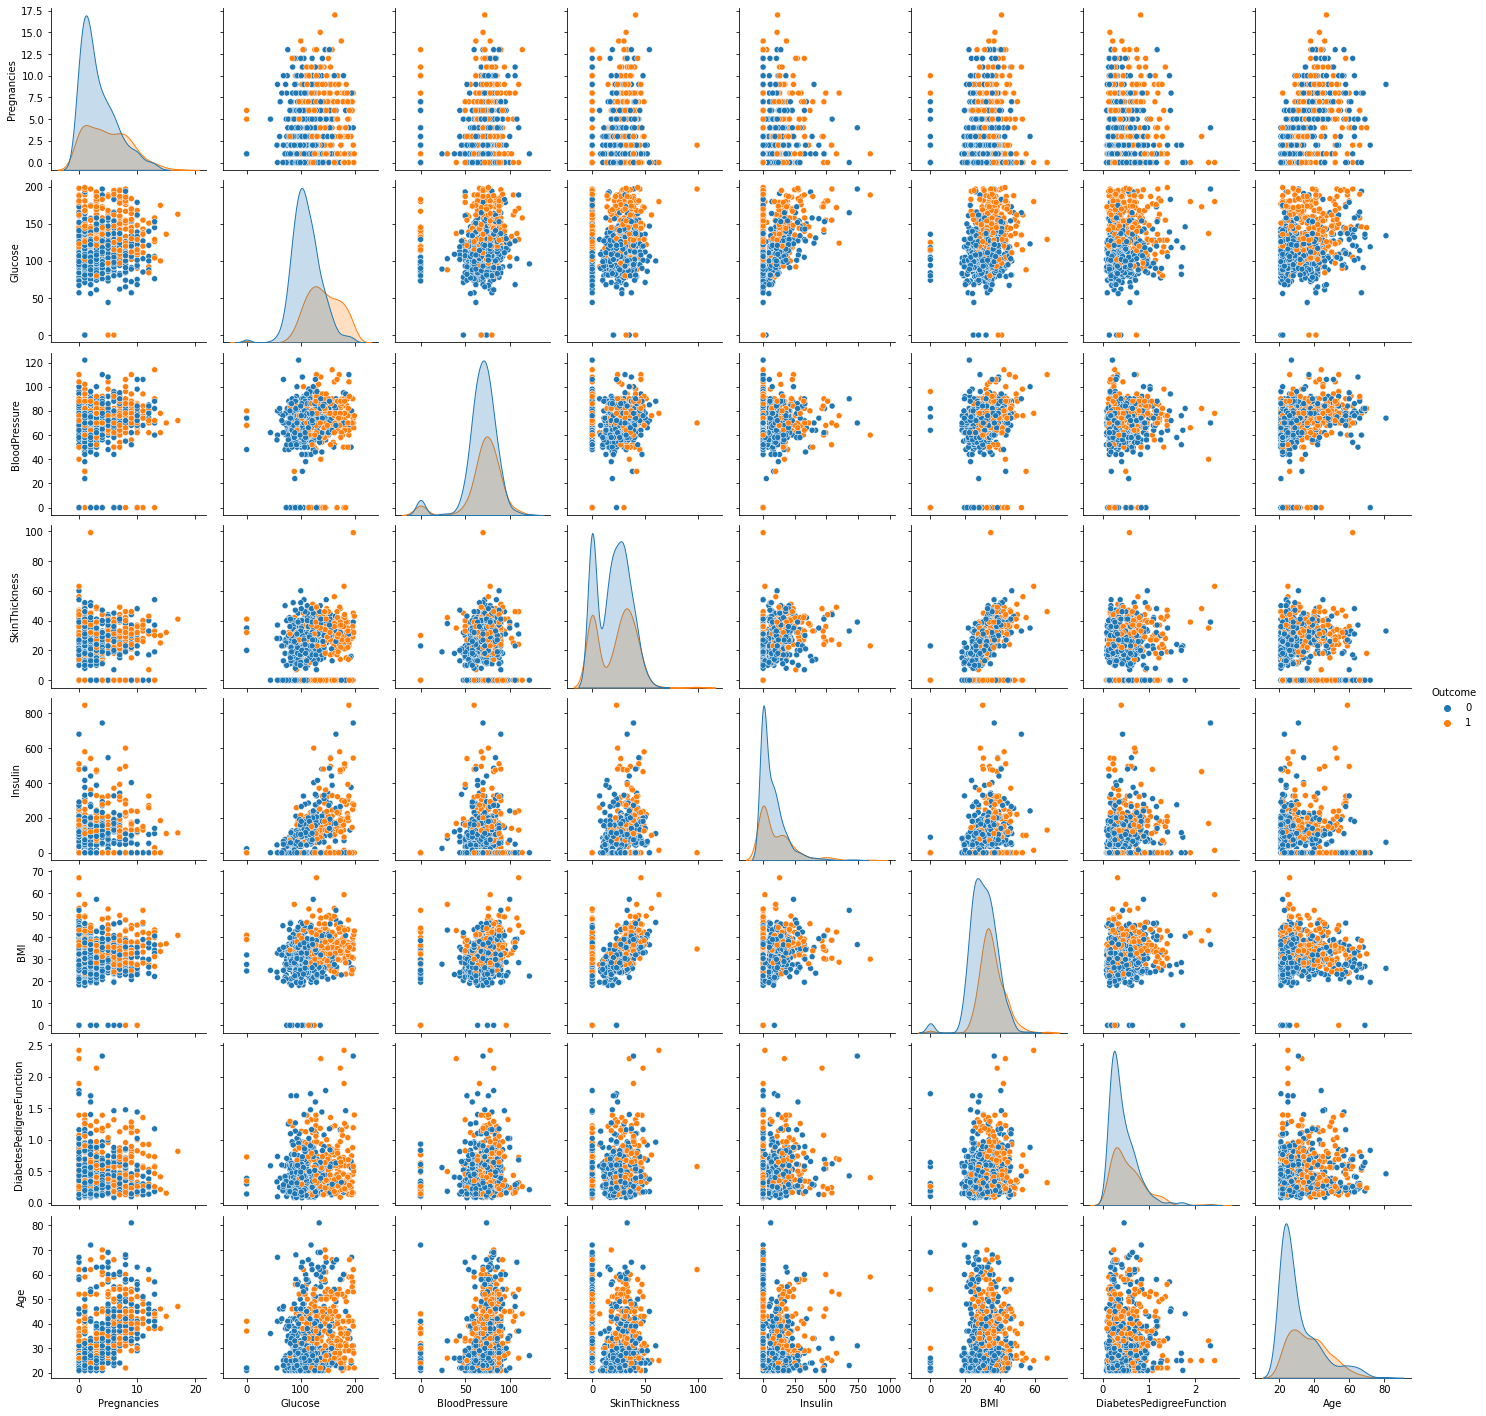

In [11]:
sns.pairplot(df, hue='Outcome')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1feec4bd50>,
      dtype=object)

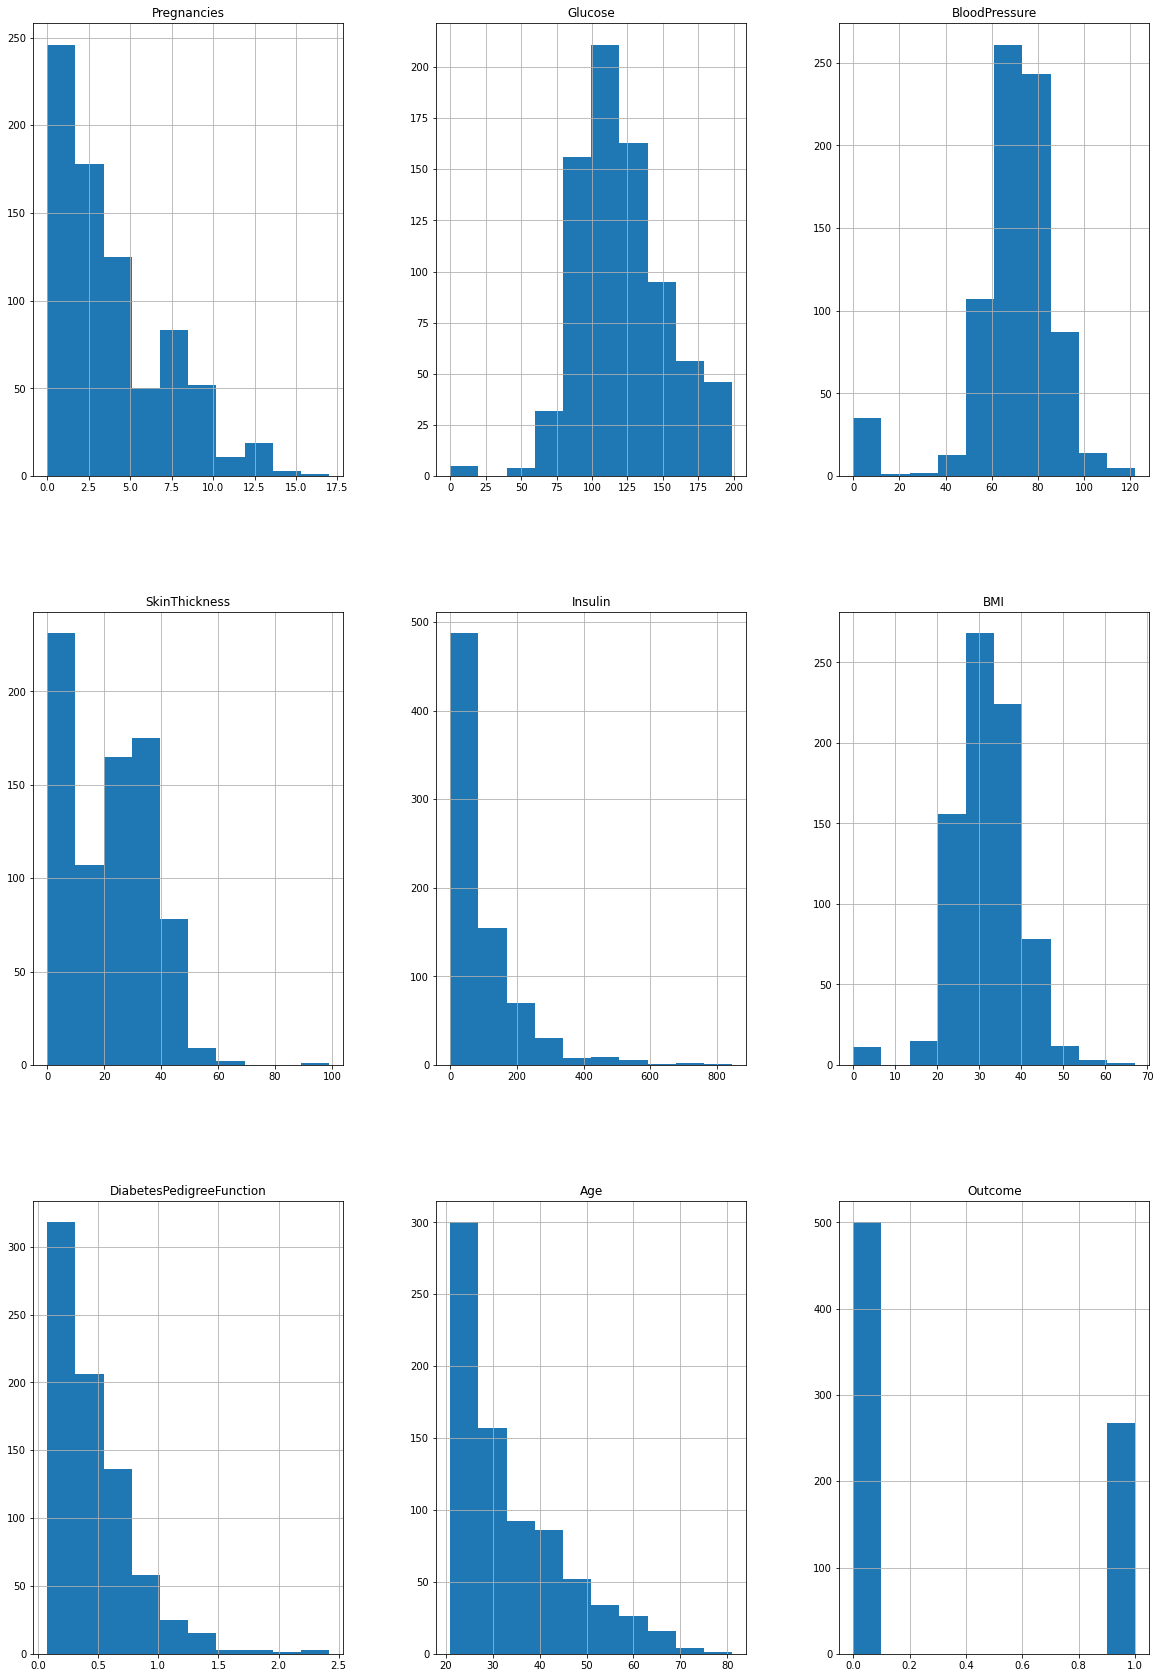

In [12]:
df.hist(figsize=(20,30))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


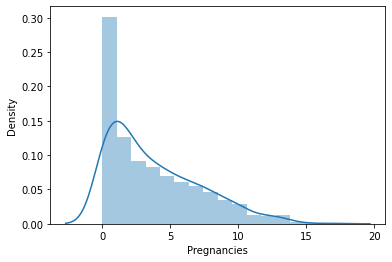

In [13]:
sns.distplot(df['Pregnancies'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


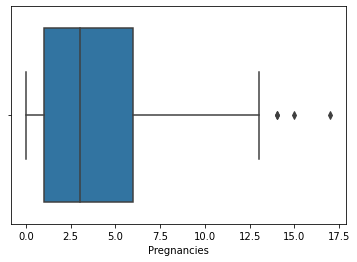

In [14]:
sns.boxplot(df['Pregnancies'])

Pregnancies Inference:

* Data is right skewed indicating there are lesser instances of higher number of pregnancies than lower number of pregnancies. This is in line with general observation.
* There are several instances of zero Pregnancies observed. However, they can be accepted as such because this is quite possible.
* There are few outliers on the higher side, but they are very rare, and can be considered normal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


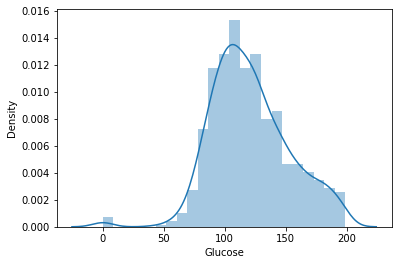

In [15]:
sns.distplot(df['Glucose'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


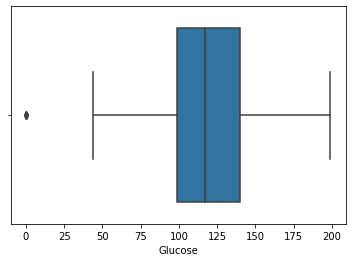

In [16]:
sns.boxplot(df['Glucose'])

BMI Inference:
*  There are two peaks in distribution plot due to presence of some zero values. 
* Zero values are not possible in the real world. These will have to be normalized. 
* Apart from the zero values, the distribution of non zero values is mostly normal with a slight right skew.     
* There are some higher outliers above 50, which look abnormal (morbidly obsese). 

DiabetesPedigreeFunction Inference:
* The distribution looks mostly normal with slight right skew. 
*  There are high outliers indicating high tendency of diabetes. 

Age Inference:
*  Age distribution looks normal with respect to real population. 
*  There are no values less 21 years. 

Outcome Inference:
*  Although the data type is int64, this attribute has only two values 0 and 1. 
*  Nearly one-third of the sample is positive for diabetes. 
*  This field can be converted to a categorical value to have better visualization using hue.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


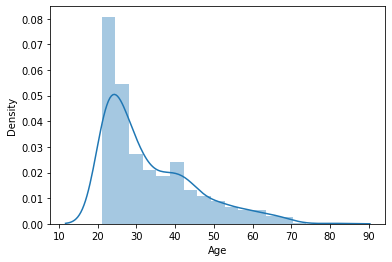

In [17]:
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


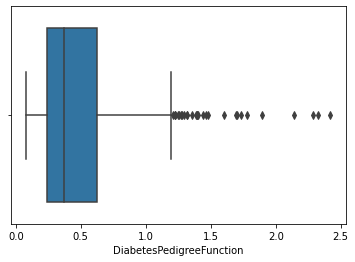

In [18]:
sns.boxplot(df['DiabetesPedigreeFunction'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


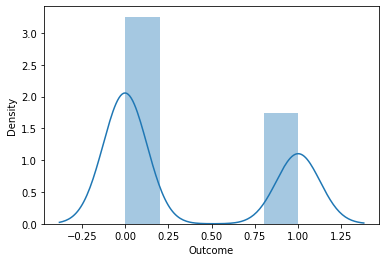

In [19]:
sns.distplot(df['Outcome'])

## Missing Data

Using seaborn, with a heatmap, finding the missing data!

Zero values for SkinThickness and Insulin are very high, and they co-occur.
Zero values for Glucose, BloodPressure and BMI are relatively low, and they rarely co-occur.
Deletion of these zero values does not look feasible because:
Large number of rows will be deleted, valuable data will be lost.
Deleted rows may contain non-zero values of other attributes, which could be useful.Thus, strategy for zero values could be as follows:
No action for zero values in Pregnancies. Reason: High number, but assumed to be valid real life scenario.
Do not drop rows for zero values in Glucose, BloodPressure and BMI. Reason: Relatively low and non co-occurring values.
Do not consider SkinThickness and Insulin as predictors Reason: Very high and co-occuring zero values.

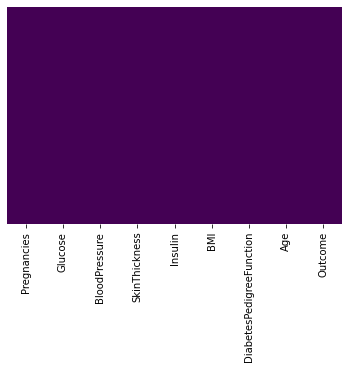

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

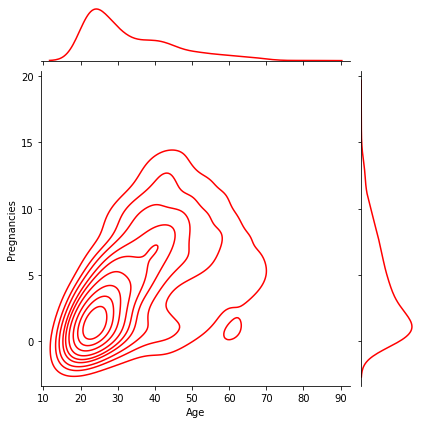

In [21]:
sns.jointplot(x='Age',y='Pregnancies',data=df,color='red',kind='kde');

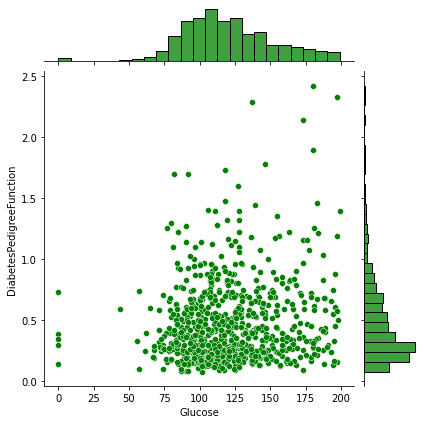

In [22]:
sns.jointplot(x='Glucose',y='DiabetesPedigreeFunction',data=df,color='green')

Data Cleaning

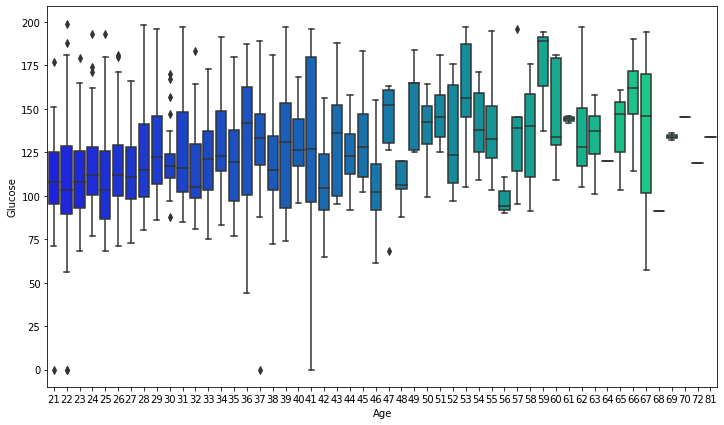

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age',y='Glucose',data=df,palette='winter')

There are decisively high number of Pregnancies for Diabetic samples compared to Non-Diabetic samples,
indicating a high correlation. There are very few high value outliers for Non-Diabetic samples. 

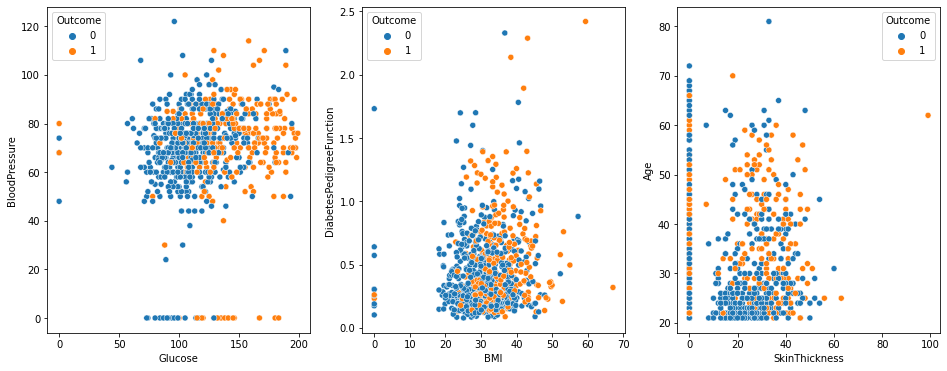

In [83]:
plt.figure(figsize=[16,6])
plt.subplot(1,3,1)
sns.scatterplot(data= df, x= 'Glucose', y='BloodPressure', hue='Outcome')
plt.subplot(1,3,2)
sns.scatterplot(data= df, x= 'BMI', y='DiabetesPedigreeFunction', hue='Outcome')
plt.subplot(1,3,3)
sns.scatterplot(data= df, x= 'SkinThickness', y='Age', hue='Outcome')
plt.show()

It can be seen taht there is somewhat positive linear relation between Insulin and Glucose. Same with Age and Pregnancies. If this relation is very strong or not that we can see later on using correlation heatmap.

From the scatterplots it can be seen that observations of outcome 0 and 1 are almost overplapping with each other in case of most of the features. Only For Glucose, we can see if Glucose is below 90 then there is very low chance of outcome 1 and if Glucose is above 150 then there is a very high chance of outcome to be 1.

Again if BMI is below 25 then there is almost no observation having outcome =1 where if BMI is more than 25 then we can see both 0 and 1 in outcome.

Also it can be seen that the probablity of outcome =1 when age<25 is lesser than the when age > 25.

Correlation Analysis

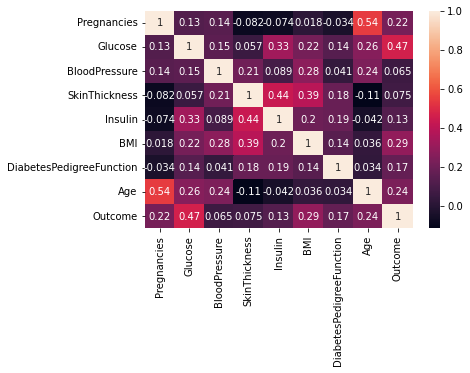

In [24]:
sns.heatmap(df.corr(), annot=True)

Correlation matrix


Correlation Analysis

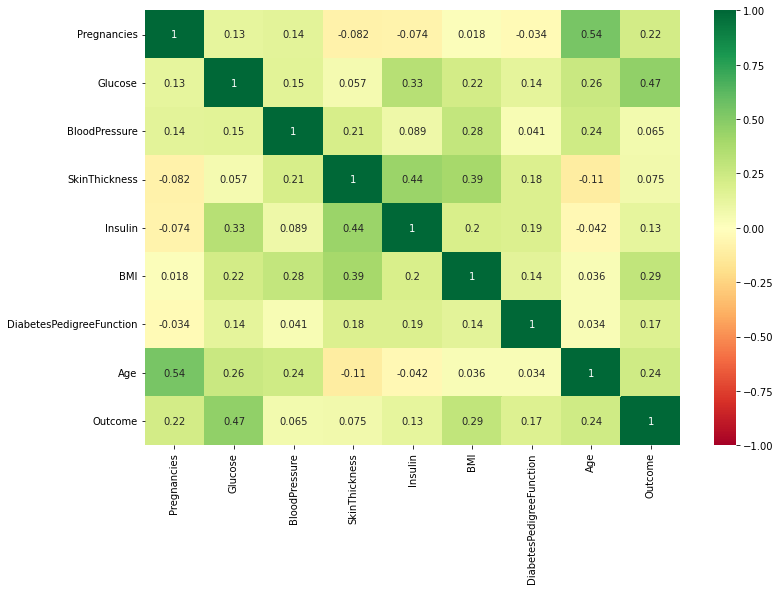

In [27]:
plt.figure(figsize=[12,8])
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1, center= 0)
plt.show()


We can see that there is no very strong linear relations between any of the variables. There are medium linear relations between Age and Number of Pregnancies, BMI and SkinThickness, Insulin and Glucose.

## Data Preparation

In [28]:
df1 = df.copy() # 

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
scaler.fit(df1.drop('Outcome',axis=1))

StandardScaler()

In [31]:
scaler.fit (df1.drop('Outcome',axis=1)) # fit scaler to features

StandardScaler()

In [32]:
sFeatures = scaler.fit_transform(df1.drop('Outcome',axis = 1)) # transform features to scaled version

In [33]:
dfSfeatures = pd.DataFrame (sFeatures, columns = df1.columns[:-1]) # convert scaled features to dataframe
dfSfeatures.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## Train, Test, Split

Objects X and y which are the scaled feature values and labels respectively.

By standarize the variables.

In [34]:
from sklearn.model_selection import train_test_split
X = dfSfeatures
y = df1 ['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

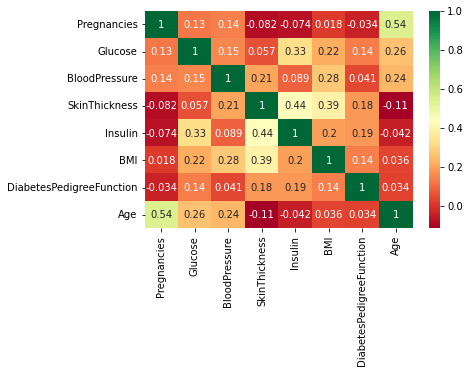

In [35]:
sns.heatmap(data=X.corr(),annot=True, cmap='RdYlGn')

## Logistic Regression

Train and fit the logistic regression model on the training set.

In [36]:
from sklearn.linear_model import LogisticRegression 
logMdel = LogisticRegression()
res = logMdel.fit(X_train,y_train)
res.score(X_train,y_train)


0.7821229050279329

##### Predictions and Evaluations

Predict values for the testing data

In [37]:
predictions = logMdel.predict(X_test)

Print Classification report

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Evaluating the Model

Evaluate my model performance by calculating the residual sum of squares and the explained variance score (R^2).

Then Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.26406926406926406
MSE: 0.26406926406926406
RMSE: 0.513876701232177


Residuals

Now I have a good model with a good fit. Exploring the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


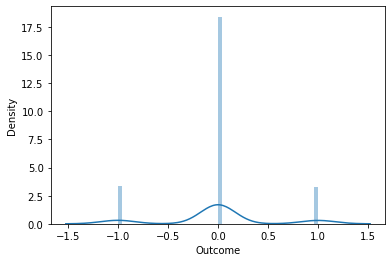

In [40]:
sns.distplot((y_test-predictions),bins=50);

## Feature Engineering

In [41]:
df2  = df.copy()
features = df2.columns[:8]
features
X = df2[features]
y = df2.Outcome

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


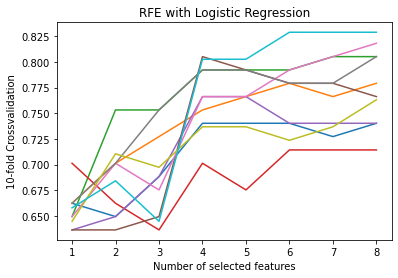

rfecv.grid_scores_: [[0.66233766 0.66233766 0.64935065 0.7012987  0.63636364 0.63636364
  0.64935065 0.66233766 0.64473684 0.65789474]
 [0.64935065 0.7012987  0.75324675 0.66233766 0.64935065 0.63636364
  0.7012987  0.7012987  0.71052632 0.68421053]
 [0.68831169 0.72727273 0.75324675 0.63636364 0.68831169 0.64935065
  0.67532468 0.75324675 0.69736842 0.64473684]
 [0.74025974 0.75324675 0.79220779 0.7012987  0.76623377 0.80519481
  0.76623377 0.79220779 0.73684211 0.80263158]
 [0.74025974 0.76623377 0.79220779 0.67532468 0.76623377 0.79220779
  0.76623377 0.79220779 0.73684211 0.80263158]
 [0.74025974 0.77922078 0.79220779 0.71428571 0.74025974 0.77922078
  0.79220779 0.77922078 0.72368421 0.82894737]
 [0.72727273 0.76623377 0.80519481 0.71428571 0.74025974 0.77922078
  0.80519481 0.77922078 0.73684211 0.82894737]
 [0.74025974 0.77922078 0.80519481 0.71428571 0.74025974 0.76623377
  0.81818182 0.80519481 0.76315789 0.82894737]]
rfecv.support_: [ True  True  True  True  True  True  True 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


In [42]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFECV
import operator
strat_k_fold = StratifiedKFold(
    n_splits=10,
    #random_state=42
)

logreg_model = LogisticRegression()

rfecv = RFECV(
    estimator=logreg_model,
    step=1,
    cv=strat_k_fold,
    scoring='accuracy'
)
rfecv.fit(X, y)

plt.figure()
plt.title('RFE with Logistic Regression')
plt.xlabel('Number of selected features')
plt.ylabel('10-fold Crossvalidation')

# grid_scores_ returns a list of accuracy scores
# for each of the features selected
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()
print('rfecv.grid_scores_: {grid_scores}'.format(grid_scores=rfecv.grid_scores_))

# support_ is another attribute to find out the features
# which contribute the most to predicting
new_features = list(filter(
    lambda x: x[1],
    zip(features, rfecv.support_)
))

print('rfecv.support_: {support}'.format(support=rfecv.support_))

# Features are the most suitable for predicting the response class

new_features = list(map(operator.itemgetter(0), new_features))
print('\nThe most suitable features for prediction: {new_features}'.format(new_features=new_features))

## Smote

In [64]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
os = SMOTE(random_state=0)
X_train_res, y_train_res = os.fit_resample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 213
Before OverSampling, counts of label '0': 401 

After OverSampling, the shape of train_X: (802, 2)
After OverSampling, the shape of train_y: (802,) 

After OverSampling, counts of label '1': 401
After OverSampling, counts of label '0': 401


In [43]:
# Features chosen based on RFECV result
best_features = [
    'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction'
]

X = StandardScaler().fit_transform(X[best_features])

# Split your data into training and testing (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.20
)

In [44]:
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print('PCA sum: {:.2f}%'.format(sum(pca.explained_variance_ratio_) * 100))

[0.33842817 0.25748883]
PCA sum: 59.59%


In [45]:
# Model learning
log_reg = LogisticRegression(
    # Parameters chosen based on GridSearchCV result
    C=1,
    multi_class='ovr',
    penalty='l2',
    solver='newton-cg',
    random_state=42
)
log_reg.fit(X_train, y_train)

log_reg_predict = log_reg.predict(X_test)
log_reg_predict_proba = log_reg.predict_proba(X_test)[:, 1]

In [46]:
# Model evaluation
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, log_reg_predict) * 100))
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, log_reg_predict_proba) * 100))
print('Classification report:\n\n', classification_report(y_test, log_reg_predict))
print('Training set score: {:.2f}%'.format(log_reg.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(log_reg.score(X_test, y_test) * 100))

Accuracy: 83.77%
AUC: 85.38%
Classification report:

               precision    recall  f1-score   support

           0       0.84      0.93      0.88        99
           1       0.84      0.67      0.75        55

    accuracy                           0.84       154
   macro avg       0.84      0.80      0.81       154
weighted avg       0.84      0.84      0.83       154

Training set score: 76.22%
Testing set score: 83.77%


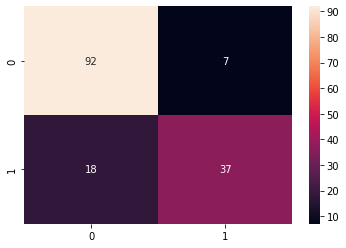

In [47]:
# Confusion Matrix
outcome_labels = sorted(df.Outcome.unique())

sns.heatmap(
    confusion_matrix(y_test, log_reg_predict),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

## Chi-Square

In [92]:
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
dfc = df.copy()
X = dfc.drop(dfc[['Outcome']], axis=1)
y = dfc['Outcome']
chiSqr = SelectKBest(score_func=chi2, k='all')
chiSqr.fit(abs(X), y)
features_score_pvalue=pd.DataFrame({"Score":chiSqr.scores_,"P_Value":np.round(chiSqr.pvalues_,3)},index=X.columns)
features_score_pvalue.nlargest(n=21,columns="Score")

,Score,P_Value
Insulin,2175.565273,0.00
Glucose,1411.887041,0.00
Age,181.303689,0.00
BMI,127.669343,0.00
Pregnancies,111.519691,0.00
SkinThickness,53.108040,0.00
BloodPressure,17.605373,0.00
DiabetesPedigreeFunction,5.392682,0.02


In [ ]:
X = X.reshape(X.shape[1:])
chiSqrFit = svm.SVC(kernel='poly')
chiSqrFit.fit(X_train_res, y_train_res)
y_pred = chiSqrFit.predict(X_test)
cm = confusion_matrix(y_test, predictions)

## Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_model= RandomForestClassifier()

param_grid= {'n_estimators': list(range(20,41,1)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3,4,5,6,7,8],
    'criterion': ['gini', 'entropy']}

rf_grid= GridSearchCV(rf_model, param_grid= param_grid, cv= 25, verbose= True, n_jobs= -1)
rf_grid.fit(X_train, y_train)

In [ ]:
print(rf_grid.best_score_)

In [ ]:
rf_model_opt= RandomForestClassifier(criterion= 'gini', max_depth= 6, max_features= 'auto', n_estimators= 32)
rf_model_opt.fit(X_train, y_train)
rf_model_opt.score(X_test, y_test)

In [ ]:
y_pred= rf_model_opt.predict(X_test)

In [ ]:
tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
probs = rf_model_opt.predict_proba(data_scaled)
probs 

##### ROC Curve

In [ ]:
predict_pr = rf_model_opt.predict_proba(data_scaled)
predict_pr = predict_pr[:, 1]
auc = roc_auc_score(label, predict_pr)
print('AUC:', round(auc, 4))
fpr, tpr, thresholds = roc_curve(label, predict_pr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## KNN

In [51]:
knn_model= KNeighborsClassifier()
param_grid= {'n_neighbors': list(range(1,20)), 'weights': ["uniform", "distance"], 'metric': ['minkowski','manhattan','euclidean']}
knn_grid= GridSearchCV(knn_model, param_grid= param_grid, cv= 25, verbose= True, n_jobs= -1)
knn_grid.fit(X_train, y_train)

Fitting 25 folds for each of 114 candidates, totalling 2850 fits


GridSearchCV(cv=25, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [52]:
# Checking the best score on train data

print(knn_grid.best_score_)
print(knn_grid.best_params_)

0.7818
{'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}


In [53]:
# Testing on test data

knn_opt = KNeighborsClassifier(n_neighbors= 15, weights= 'uniform', metric= 'minkowski')
knn_opt.fit(X_train, y_train)
knn_opt.score(X_test, y_test)

0.7532467532467533

In [54]:
y_pred= knn_opt.predict(X_test)

In [55]:
#Confusion Matrix

tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 81
False Positive: 18
False Negative: 20
True Positive: 35


In [56]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



##### ROC

In [ ]:

knn_opt = KNeighborsClassifier(n_neighbors= 15, weights= 'uniform', metric= 'minkowski')
knn_opt.fit(X_train, y_train)
knn_opt.score(X_test, y_test)
knn= KNeighborsClassifier()
ss= StandardScaler()
dfknn = df.copy()
data_scaled= pd.DataFrame(ss.fit_transform(dfknn))




predict_pr = knn_opt.predict_proba(data_scaled)
predict_pr = predict_pr[:, 1]
auc = roc_auc_score(label, predict_pr)
print('AUC:', round(auc, 4))
fpr, tpr, thresholds = roc_curve(label, predict_pr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.5256


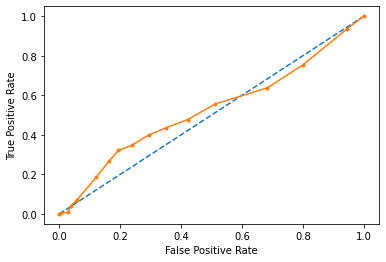

In [81]:
knn_opt = KNeighborsClassifier(n_neighbors= 15, weights= 'uniform', metric= 'minkowski')
knn_opt.fit(X_train, y_train)
dfknn = df.copy()
label= df.iloc[:,-1]
nn = dfSfeatures.iloc[:, :2].values
predict_pr = knn_opt.predict_proba(nn)
predict_pr = predict_pr[:, 1]
auc = roc_auc_score(label, predict_pr)
print('AUC:', round(auc, 4))
fpr, tpr, thresholds = roc_curve(label, predict_pr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

There is no change in classification report of KNN, whether we include or exclude Insulin feature in our model.

## Summary

In this analysis, we saw how we can see deficiencies in our models like overfitting or biased training data just by reading these plots.
In our case, we saw how Insulin, Glucose, Age, and BMI impacted our model's predictions and thus understood how these factors contribute to Diabetes. We also understood that we can't be confident that our model has learned the right relationship between Diabetes and Age for over 60 years. From the dataset, We can see Age and Pregnancy, Insulin and Glucose, BMI, and Skin Thickness are positively correlated.
The Variance covariance structure between the correlated variables is different for different levels of Outcome,
This difference in variance-covariance could be used for discriminant analysis.
There are missing values coded as 0 in the data set,
A distinct level of Hierarchy in the data set is observed (BMI and Skin Thickness + PDiabetese Pedigree), (Age and Praagnencies + Blood Pressure) and (Insulin and Glucose) which defines the dataset.
The variables like Age and Preganencies follow Poisson distribution due to which they have a lot of false outliers observed in the box plot
Some Variables have mixtures present in marginal probability distribution As expected, there seems to be a positive correlation between Glucose and Insulin. This correlation is slightly less for Diabetic samples (the slope of the blue line is less). This is very much a symptom of diabetes, for example, Insulin is not able to control the blood sugar levels.


## Reference

https://scikit-learn.org/stable/modules/svm.html 

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://www.geeksforgeeks.org/understanding-logistic-regression/

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

https://cjrogers.com/the-7-types-of-data-stories/3266 
